Diffusion coefficient D in [cm] is 9.208103130755065
Infinite multiplication factor k_inf is 1.024804177545692
Material Buckiling factor Bm2 is 0.00041267999999999974
Extrapolation length z0 in [cm] is 19.613259668508285
Critical core radius in [cm] is 108.25708492632302


Text(0, 0.5, 'Critical radius R_extr [m]')

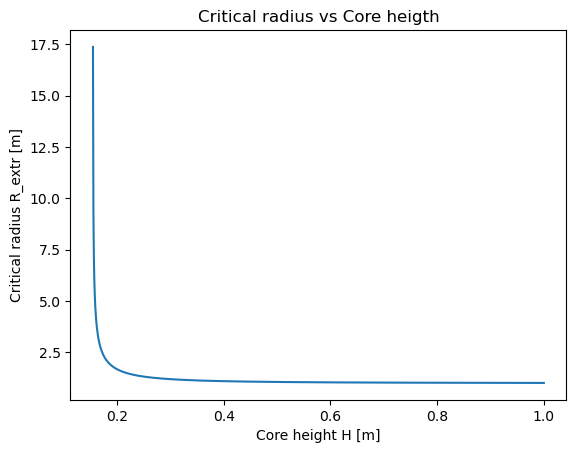

In [136]:
#Assignment 1
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

#Data obatained from table 5.3 from Duderstad Hamilton
Sigma_tr_total = 3.62e-2 #Total Macroscopic cross section [cm-1]
nu_Sigma_235 = 0.145    # avg number of neutron per fission 235*Macroscopic cross section for fission U-235
nu_Sigma_238 = 1.20e-2  # avg number of neutron per fission 238*Macroscopic cross section for fission U-238
Sigma_abs_total = 0.1532 # Total Macroscopic absorption cross section [cm-1]


#Diffusion coefficient
D = (3*Sigma_tr_total)**-1 

#Multiplication factor
k_inf = (nu_Sigma_235 + nu_Sigma_238)/Sigma_abs_total 

#Material Buckling factor 
Bm2 = (nu_Sigma_235 + nu_Sigma_238 - Sigma_abs_total)/(D) 

lambda_tr = (Sigma_tr_total)**-1

#Extrapolation length
z0 = 0.71*lambda_tr 


H = 370 #Height of my reactor core
H_extr = H+2*z0 #Extrapolated height length
Bz2 = (np.pi/H_extr)**2 #Axial Buckling
nu0 = 2.405 #First zero Bessel function

#Extrapolated radius R_extr is
R_extr = nu0/(Bm2-Bz2)**(1/2) -z0

print("Diffusion coefficient D in [cm] is", D)
print("Infinite multiplication factor k_inf is", k_inf)
print("Material Buckiling factor Bm2 is", Bm2)
print("Extrapolation length z0 in [cm] is",z0)
print("Critical core radius in [cm] is", R_extr)

#Plotting critical radius vs core Height
R_extr = lambda H:(nu0/(Bm2 - (np.pi/H)**2)**(1/2)-z0)
height = np.linspace(155,1000,1000)
plt.plot(height/1000,R_extr(height)/100)
plt.title('Critical radius vs Core heigth')
plt.xlabel('Core height H [m]')
plt.ylabel('Critical radius R_extr [m]')


Volume concentration of U235 is = 0.0006426625120233082
Volume concentration of H20 is = 0.9993573374879767
Atomic concentration of U235 [#/cm3] is = 3.1125594866358485e+19
Atomic concentration of H20 [#/cm3] is = 3.3434054924181084e+22


Text(0, 0.5, 'Neutron Flux [n/(cm2*s)]')

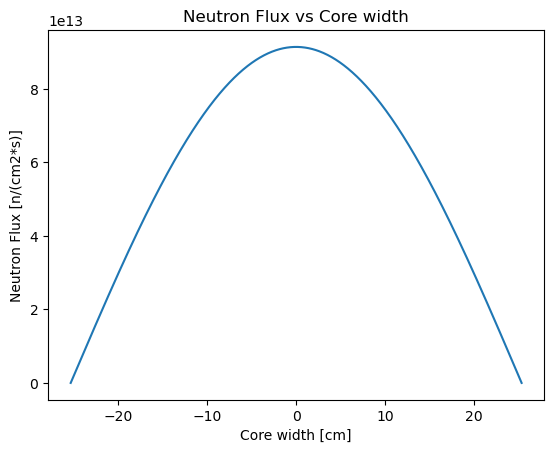

In [138]:
#Assignment 2

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_bvp 
from scipy.integrate import quad


#Criticality composition:

microABS_h20 = 0.619*10**-24  #Microscopic absorption cross section of water at 60°C
microABS_235 = 635.99*10**-24 #Microscopic absorption cross section of Uranium 235 at 60°C
microFission_235 = 541.25*10**-24 #Microscopic fission cross section of Uranium 235 at 60°C
Nav = 6.022*10**23 #Avogadro number
rho_235 = 18.9 #Density of Uranium 235 [g/cm3]
rho_h20 = 1 #Density of Water [g/cm3]
MM235 = 235 #Molar mass of Uranium 235
MMh20 = 18 #Molar mass of H20
nu = 2.44 #avg number of neutrons per fission event
D = 0.16 #Diffusion constant
#Grouping constants:
A = nu*microFission_235*Nav*rho_235/MM235
B = microABS_235*Nav*rho_235/MM235
C = Nav*rho_h20*microABS_h20/MMh20
a = 50 #Width of my slab reactor 
sigma_tr = 1/(3*D)
lambda_tr = sigma_tr**-1
z0 = 0.7104*lambda_tr
a_extr = a + z0*2
Bg2 = (np.pi/a_extr)**2
wf = 200*10**6*1.6019*10**-19

vol_U235 = (C + D*(np.pi/a_extr)**2)/(A-B+C)  
vol_H20 = (1-vol_U235)

print("Volume concentration of U235 is =", vol_U235)    
print("Volume concentration of H20 is =", vol_H20) 
print("Atomic concentration of U235 [#/cm3] is =", vol_U235*Nav*rho_235/MM235)    
print("Atomic concentration of H20 [#/cm3] is =", vol_H20*Nav*rho_h20/MMh20) 


nu_big_sigma_fission = A*vol_U235      #Macroscopic fission cross section times avg number of neutrons
big_sigma_abs = B*vol_U235 + vol_H20*C #Macroscopic absorption cross section

flux_function = lambda x: np.cos((np.pi/a_extr)*x)
cosine_integration=quad(flux_function,-a/2, a/2) 
phi_0 = (25*a)/(cosine_integration[0]*wf*nu_big_sigma_fission/nu)
Bm2  = (nu_big_sigma_fission-big_sigma_abs)/D #Material Buckling


def fun(x,y):
    y1,y2 = y
    dydt = [
        y2,
        -Bm2*y1
    ]
     
    return dydt

def bc(ya, yb):
    return np.array([ya[0], yb[0]])

x = np.linspace(-a_extr/2, a_extr/2, 1000)
yg = np.ones((2,x.size)) #Initial guess array (2 variables)

Solution = solve_bvp(
    fun, 
    bc, 
    x, 
    yg
)

plt.plot(Solution.x, phi_0*Solution.y[0])
plt.title('Neutron Flux vs Core width')
plt.xlabel('Core width [cm]')
plt.ylabel('Neutron Flux [n/(cm2*s)]')


In [44]:
#Assignment 3
import sympy as sp
import numpy as np
#Creating x variable
x = sp.Symbol("x")
#DATA:
nu = 2.44 #Avg number of neutron per fission
microFission_235 = 541.25*10**-24 #Microscopic fission cross section of Uranium 235 at 60°C
microABS_h20 = 0.619*10**-24  #Microscopic absorption cross section of water at 60°C
microABS_235 = 635.99*10**-24 #Microscopic absorption cross section of Uranium 235 at 60°C
MM235 = 235 #Molar mass of Uranium 235
MMh20 = 18 #Molar mass of Water
Nav = 6.022*10**23 #Avogadro number
rho_h20 = 1 #Density of water
rho_235 = 18.9 #Density of Uranium 235
#########################################################

#Core DATA
vol_235_core = 0.0006426625120233082 #Volume percentage of U235 in the core
vol_h20_core = 0.9993573374879767 #Volume percentage of H20 in the core
A = nu*microFission_235*Nav*rho_235/MM235 #Grouping constant
B = microABS_235*Nav*rho_235/MM235 #Grouping constant
C = Nav*rho_h20*microABS_h20/MMh20 #Grouping constant
D_core = 0.16 #Diffusion coefficient of the CORE
Bm2_core = (vol_235_core*A - vol_235_core*B - vol_h20_core*C)/D_core #Material Buckling factor in the Core

#Diffusion equation for the reactor core
phi_1 = sp.Function("phi_1") 
B1 = sp.Symbol("B1",positive = True)
diff_eq_core = sp.Eq(phi_1(x).diff(x).diff(x)+(B1**2)*phi_1(x),0)
flux_core = sp.dsolve(diff_eq_core)


#Blanket DATA
MM238 = 238 #Molar mass of Uranium 238
MMU = 7.2e-3*MM235+0.9928*MM238 #Molar mass of Natural Uranium
rho_U = 18.9 #Density of Uranium 238
ratio = 0.01 #Atomic ratio between Natural Uranium and Water
K = (rho_h20*MMU*ratio)/(rho_U*MMh20) #Grouping constant
vol_h20_blanket = 1/(1+K) #Volume percentage of water in the Blanket
vol_U_blanket = 1-vol_h20_blanket #Volume percentage of Uranium in the Blanket
micro_sigma_total_h20 = 103*10**-24 #Total microscopic cross section for water
micro_sigma_scattering_h20 = 103*10**-24 #Microscopic scattering cross section for water
microABS_U = (7.2e-3*(577+101)*10**-24)+0.9928*2.73*10**-24 #Microscopic absorption cross section for Uranium 
micro_sigma_scattering_U = 8.3*10**-24 #Microscopic scattering cross section for Uranium
micro_sigma_total_U = microABS_U + micro_sigma_scattering_U #Total microscopic cross section for Uranium



mu0_h20 = 1-0.676
mu0_U = 1-0.9972

K1 = rho_h20*vol_h20_blanket*Nav/MMh20 #Grouping constant
SigmaABS_blanket = ratio*((microABS_U) + (K1*microABS_h20)/ratio) #Macroscopic cross section of absorption in the Blanket

A1 = rho_h20*vol_h20_blanket*micro_sigma_total_h20/MMh20 #Grouping constant
A2 = rho_U*vol_U_blanket*micro_sigma_total_U/MMU #Grouping constant
A3 = mu0_h20*rho_h20*vol_h20_blanket*micro_sigma_scattering_h20/MMh20 #Grouping constant
A4 = mu0_U*rho_U*vol_U_blanket*micro_sigma_scattering_U/MMU #Grouping constant
D_blanket = (3*Nav*(A1+A2-A3-A4))**-1 #Diffusion coefficient for blanket
SigmaF_blanket = (Nav*rho_U*vol_U_blanket*7.2e-3*577*10**-24)/MM235

Chi2_2 = (SigmaABS_blanket-nu*SigmaF_blanket)/D_blanket #Buckling factor in the blanket

#Diffusion equation for the Blanket
phi_2 = sp.Function("phi_2")
Chi_2 = sp.Symbol("Chi_2", positive = True)
diff_eq_blanket = sp.Eq(phi_2(x).diff(x).diff(x) - ((Chi_2)**2)*phi_2(x),0)
flux_blanket = sp.dsolve(diff_eq_blanket)


#Reflector DATA
D_reflector = (3*Nav*(rho_h20*micro_sigma_total_h20/MMh20 - mu0_h20*rho_h20*micro_sigma_scattering_h20/MMh20))**-1
SigmaABS_reflector = (rho_h20*Nav/MMh20)*(microABS_h20) #Macroscopic abs cross section of the Reflector

K2_3 = SigmaABS_reflector/D_reflector #Buckling factor in the reflector

#Differential equation of the Relflector
phi_3 = sp.Function("phi_3")
K_3 = sp.Symbol('K_3', postive = True) 
diff_eq_reflector = sp.Eq(phi_3(x).diff(x).diff(x)-(K_3**2)*phi_3(x),0)
flux_reflector = sp.dsolve(diff_eq_reflector)

#Rewriting the Flux solutions & Currents as functions 
d = sp.Symbol('D')
c2,c3,c4,c5 = sp.symbols('C_2, C_3, C_4, C_5')
flux1 = c2*sp.cos(sp.sqrt(Bm2_core)*x)
flux2 = c4*sp.exp(sp.sqrt(Chi2_2)*x) + c3*sp.exp(-sp.sqrt(Chi2_2)*x)
flux3 = c5*sp.exp(-sp.sqrt(K2_3)*x)
J1 = sp.diff(flux1,x)*(-d)
J2 = sp.diff(flux2,x)*(-d)
J3 = sp.diff(flux3,x)*(-d)
width = 5;
#Defining the Boundary conditions as matrix rows
a11 = flux1.subs({c2:1})
a12 = flux2.subs({c3:-1,c4:0})
a13= flux2.subs({c3:0,c4:-1})
a14 = 0
a21 = J1.subs({c2:-1,d:D_core})
a22 = J2.subs({c3:1,d:D_blanket,c4:0})
a23 = J2.subs({c3:0,d:D_blanket,c4:1})
a24 = 0
a31 = 0
a32 = flux2.subs({c3:1,c4:0,x:x+width})
a33 = flux2.subs({c3:0,c4:1,x:x+width})
a34 = flux3.subs({c5:-1,x:x+width})
a41 = 0
a42 = J2.subs({c4:0,c3:1,x:x+width,d:D_blanket})
a43 = J2.subs({c4:1,c3:0, x:x+width,d:D_blanket})
a44 = J3.subs({c5:-1,d:D_reflector,x:x+width})

#[a11,a12,a13,a14] Flux_Core(a)-Flux_Blanket(a)=0
#[a21,a22,a23,a24] J_core(a)-J_Blanket(a)=0
#[a31,a32,a33,a34] Flux_Blanket(a+width)-Flux_Reflector(a+width)=0
#[a41,a42,a43,a44] J_Blanket(a+width)-J_Reflector(a+width)=0

M = sp.Matrix([[a11,a12,a13,a14],[a21,a22,a23,a24],[a31,a32,a33,a34],[a41,a42,a43,a44]])
display(M)
criticality = M.det()
critical_width = sp.solve(criticality,x)
print('Critical width in [cm] is ', 2*critical_width[0])



Matrix([
[                     cos(0.0619863787019428*x),                    -exp(-0.345429124859411*x),                    -exp(0.345429124859411*x),                                              0],
[-0.00991782059231085*sin(0.0619863787019428*x),  0.0496620098536189*exp(-0.345429124859411*x), -0.0496620098536189*exp(0.345429124859411*x),                                              0],
[                                             0,   0.177791169178727*exp(-0.345429124859411*x),    5.62457631961876*exp(0.345429124859411*x),   -0.149253013205682*exp(-0.380422467586085*x)],
[                                             0, 0.00882946679564036*exp(-0.345429124859411*x),  -0.279327764607338*exp(0.345429124859411*x), -0.00812485921697101*exp(-0.380422467586085*x)]])

Critical width is in [cm]  44.3400396996864


In [55]:
#Assignment 4
import sympy as sp
R = sp.Symbol("R")
H = sp.Symbol("H")
Bg = sp.Symbol("Bg")
Lam = sp.Symbol("Lambda")
nu0 = sp.Symbol("nu0")
eq1 = sp.Eq(2*sp.pi*R*H - 2*Lam*nu0**2/R**3,0)
eq2 = sp.Eq(sp.pi*R**2 - 2*Lam*sp.pi**2/H**3,0)
eq3 = sp.Eq((sp.pi/H)**2 + (nu0/R)**2 - Bg**2,0)
solutions = sp.solve([eq1,eq2,eq3],[H,R,Lam]) #Solving the system of equations respect to H,R,Lam
H,R,Lam = solutions[3] #Positive values
ratio = H/(2*R)
display(ratio)

sqrt(2)*pi/(2*nu0)

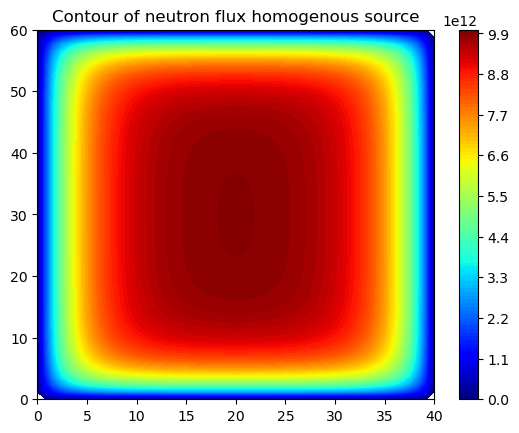

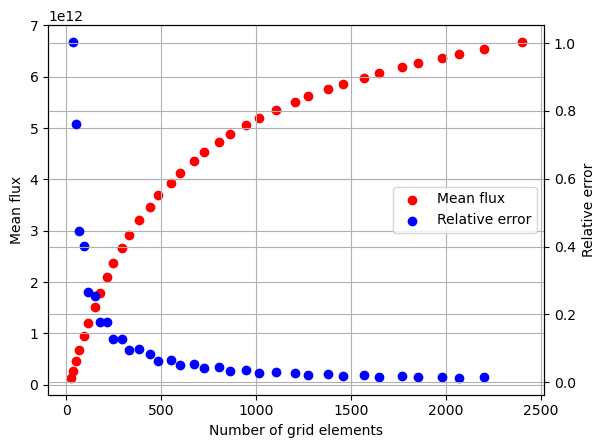

In [41]:
#Assignment 5 "Homogeneous source"

import numpy as np
import matplotlib.pyplot as plt

## Define the subdomains

a = 40 #cm (x)
b = 60 #cm (y)

Min_X = 0
Max_X = a
Min_Y = 0
Max_Y = b

## Define the problem variables

Sigma_t = 0.25 #cm-1
Sigma_s = 0.15 #cm-1


Sigma_a = Sigma_t - Sigma_s
D = 1 / (3*Sigma_t) #Diffusion coefficient

## Define the discretisation

N = 50 #X
M = 50 #Y
Mesh = N*M


Dx = (Max_X - Min_Y) / (N-1) #Delta x spacing on the x axis
Dy = (Max_Y - Min_Y) / (M-1) #Delta y spacing on the y axis
Source = 10**12 #cm-3 s-1

def get_matrices(N,M,Max_X,Min_X,Max_Y,Min_Y,Source,D):
    
    A = np.zeros((N*M,N*M)) #Filling the matrix A with zeros it is a N*M , N*M matrix 
    for j in range(0,M):
        for i in range(0,N):
            index = i+j*N 
            A[index,index] = 1 # Fill the diagonal with 1
            if (i>0 and i<N-1) and (j>0 and j<M-1):
                A[index,index-N] = 1/Dy**2
                A[index,index-1] = 1/Dx**2
                A[index,index] = -(2/Dx**2 + 2/Dy**2 + Sigma_a/D)
                A[index,index+1] = 1/Dx**2
                A[index,index+N] = 1/Dy**2
                
    B = np.zeros(N*M)
    for j in range(0,M):
        for i in range(0,N):
            index = i+j*N
            if (i>0 and i<N-1) and (j>0 and j<M-1):
                B[index]= -Source/D
    
                
    return A,B


## Now solve (obtaining a 1D array which must be mapped on the 2D mesh)

A,B = get_matrices(N,M,Max_X,Min_X,Max_Y,Min_Y,Source,D)
fi_1d = np.linalg.solve(A,B) # Solves Ax=B, #Gives out the solution for the flux.

fi_2d=np.zeros((M,N))

for j in range(0,M):
    for i in range(0,N):
        z=i+j*N
        fi_2d[j,i]=fi_1d[z] #Inserting the elements of the flux in a Matrix

## Now we plot the 2D flux. We use the contourf function of matplotlib,
## which needs as input the mesh grid and the colour map

LX=np.linspace(Min_X, Max_X, N) #x-axis domain
LY=np.linspace(Min_Y, Max_Y, M) #y-axis domain

colorinterpolation = 100
colourMap = plt.cm.jet # Define the color map (jet = rainbow ; coolwarm = blue to red)

X,Y = np.meshgrid(LX,LY)

plt.title("Contour of neutron flux homogenous source")
plt.contourf(X, Y, fi_2d, colorinterpolation, cmap=colourMap)
plt.colorbar()



N_grid = np.linspace(4,40,36,dtype=int)
M_grid = np.linspace(6,60,36,dtype=int)
Mesh_grid = N_grid*M_grid
Mean_Flux = np.zeros(len(N_grid))
for k in range(0,len(N_grid)):
    A,B = get_matrices(N_grid[k],M_grid[k],Max_X,Min_X,Max_Y,Min_Y,Source,D)
    fi_1d = np.linalg.solve(A,B)
    Mean_Flux[k] = np.mean(fi_1d)
p = 2
e = np.zeros(len(N_grid)-2)
GCI = np.zeros(len(N_grid)-2)
for k in range(0,len(N_grid)-2):
    e[k] = (Mean_Flux[k+1]-Mean_Flux[k])/Mean_Flux[k]




fig,ax1 = plt.subplots()
p1 = ax1.scatter(Mesh_grid,Mean_Flux,color='red',label='Mean flux')
ax1.set_xlabel("Number of grid elements")
ax1.set_ylabel("Mean flux")
ax2 = ax1.twinx()
p2 = ax2.scatter(Mesh_grid[1:-1],e,color='blue',label='Relative error')
ax2.set_xlabel("Number of grid elements")
ax2.set_ylabel("Relative error")
lines1,labels1 = ax1.get_legend_handles_labels()
lines2,labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1+lines2,labels1+labels2,loc='center right')
ax1.grid()
ax2.grid()



C:\Users\UTENTE\AppData\Local\Temp\ipykernel_19568\1926000861.py:105: RuntimeWarning: invalid value encountered in double_scalars
  e[k] = (Mean_Flux[k+1]-Mean_Flux[k])/Mean_Flux[k]
C:\Users\UTENTE\AppData\Local\Temp\ipykernel_19568\1926000861.py:105: RuntimeWarning: divide by zero encountered in double_scalars
  e[k] = (Mean_Flux[k+1]-Mean_Flux[k])/Mean_Flux[k]


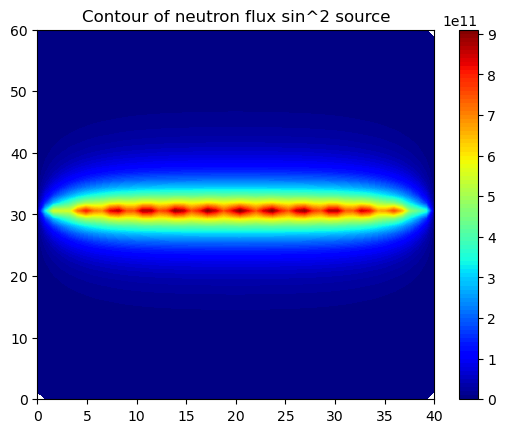

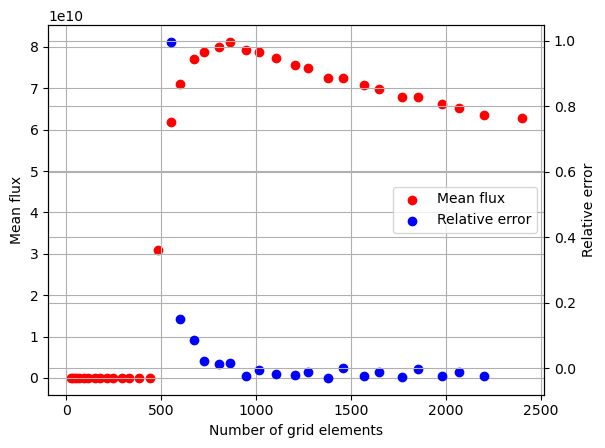

In [45]:
#Assignment 5 "Sin^2(x) source"

import numpy as np
import matplotlib.pyplot as plt
## Define the subdomains

a = 40 #cm (x)
b = 60 #cm (y)

Min_X = 0
Max_X = a
Min_Y = 0
Max_Y = b

## Define the problem variables

Sigma_t = 0.25 #cm-1
Sigma_s = 0.15 #cm-1
Sigma_a = Sigma_t - Sigma_s
D = 1 / (3*Sigma_t) #Diffusion coefficient


## Define the discretisation

N = 50 #X
M = 50 #Y
Mesh = N*M

def Source(x,y):
    if y>((M-1)/2-0.5)*Dy and y<=((M-1)/2 +0.5)*Dy: #Condition for which y is in the midplane
        Source = 10**12*np.sin(x)**2
    else:
        Source = 0
    return Source

Dx = (Max_X - Min_X)/(N-1) #Delta x spacing on the x axis
Dy = (Max_Y - Min_Y)/(M-1) #Delta y spacing on the y axis

## Build the matrix A
def get_matrices(N,M,Max_X,Min_X,Max_Y,Min_Y,Source,D):
    A = np.zeros((N*M,N*M))
    for j in range(0,M):
        for i in range(0,N):
            index = i+j*N 
            A[index,index] = 1
            if (i>0 and i<N-1) and (j>0 and j<M-1):
                A[index,index-N] = 1/Dy**2
                A[index,index-1] = 1/Dx**2
                A[index,index] = -(2/Dx**2 + 2/Dy**2 + Sigma_a/D)
                A[index,index+1] = 1/Dx**2
                A[index,index+N] = 1/Dy**2
                

    B = np.zeros(N*M)
    for j in range(0,M):
        for i in range(0,N):
            index = i+j*N
            if (i>0 and i<N-1) and (j>0 and j<M-1):
                B[index] = -Source(Dx*i,Dy*j)/D
                
    return A,B

    

## Now solve (obtaining a 1D array which must be mapped on the 2D mesh)

A,B = get_matrices(N,M,Max_X,Min_X,Max_Y,Min_Y,Source,D)
fi_1d = np.linalg.solve(A,B) # Solves Ax=B, #Gives out the solution for the flux.
fi_2d=np.zeros((M,N))

for j in range(0, M):
    for i in range(0, N):
        z=i+j*N
        fi_2d[j,i]=fi_1d[z] #Inserting the elements of the flux in a Matrix

## Now we plot the 2D flux. We use the contourf function of matplotlib,
## which needs as input the mesh grid and the colour map

LX=np.linspace(Min_X, Max_X, N) #x-axis domain
LY=np.linspace(Min_Y, Max_Y, M) #y-axis domain

colorinterpolation = 100
colourMap = plt.cm.jet # Define the color map (jet = rainbow ; coolwarm = blue to red)

X,Y = np.meshgrid(LX,LY)

plt.title("Contour of neutron flux sin^2 source")
plt.contourf(X, Y, fi_2d, colorinterpolation, cmap=colourMap)
plt.colorbar()


#Error:
N_grid = np.linspace(4,40,36,dtype=int)
M_grid = np.linspace(6,60,36,dtype=int)
Mesh_grid = N_grid*M_grid
Mean_Flux = np.zeros(len(N_grid))
for k in range(0,len(N_grid)):
    A,B = get_matrices(N_grid[k],M_grid[k],Max_X,Min_X,Max_Y,Min_Y,Source,D)
    fi_1d = np.linalg.solve(A,B)
    Mean_Flux[k] = np.mean(fi_1d)
p = 2
e = np.zeros(len(N_grid)-2)
GCI = np.zeros(len(N_grid)-2)
for k in range(0,len(N_grid)-2):
    e[k] = (Mean_Flux[k+1]-Mean_Flux[k])/Mean_Flux[k]


fig,ax1 = plt.subplots()
p1 = ax1.scatter(Mesh_grid,Mean_Flux,color='red',label='Mean flux')
ax1.set_xlabel("Number of grid elements")
ax1.set_ylabel("Mean flux")
ax2 = ax1.twinx()
p2 = ax2.scatter(Mesh_grid[1:-1],e,color='blue',label='Relative error')
ax2.set_xlabel("Number of grid elements")
ax2.set_ylabel("Relative error")
lines1,labels1 = ax1.get_legend_handles_labels()
lines2,labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1+lines2,labels1+labels2,loc='center right')
ax1.grid()
ax2.grid()

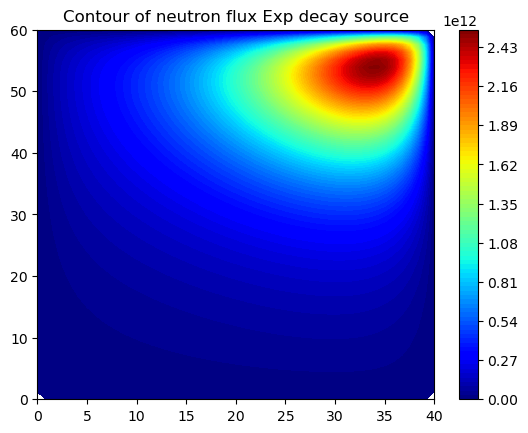

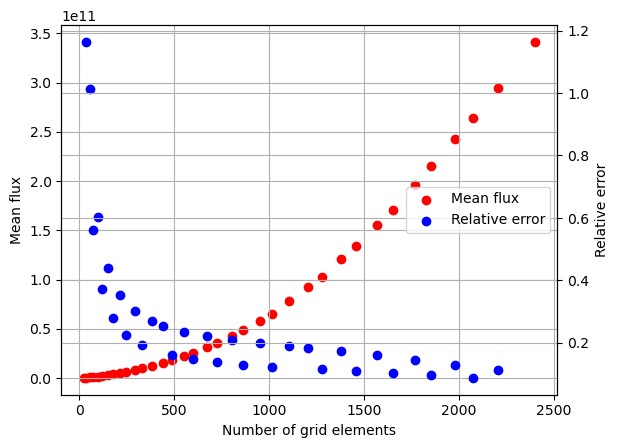

In [44]:
#Assignment 5 "Exp corner source"

import numpy as np
import matplotlib.pyplot as plt
## Define the subdomains

a = 40 #cm (x)
b = 60 #cm (y)

Min_X = 0
Max_X = a
Min_Y = 0
Max_Y = b

## Define the problem variables

Sigma_t = 0.25 #cm-1
Sigma_s = 0.15 #cm-1
Sigma_a = Sigma_t - Sigma_s
D = 1 / (3*Sigma_t) #Diffusion coefficient


## Define the discretisation

N = 50 #X
M = 50 #Y
Mesh = N*M

def Source(x,y):
    Source = 10**12*np.exp(-0.1*np.sqrt((x-a)**2+(y-b)**2))
    return Source

Dx = (Max_X - Min_X) / (N-1) #Delta x spacing on the x axis
Dy = (Max_Y - Min_Y) / (M-1) #Delta y spacing on the y axis

## Build the matrix A
def get_matrices(N,M,Max_X,Min_X,Max_Y,Min_Y,Source,D):
    A = np.zeros((N*M,N*M))
    for j in range(0,M):
        for i in range(0,N):
            index = i+j*N 
            A[index,index] = 1
            if (i>0 and i<N-1) and (j>0 and j<M-1):
                A[index,index-N] = 1/Dy**2
                A[index,index-1] = 1/Dx**2
                A[index,index] = -(2/Dx**2 + 2/Dy**2 + Sigma_a/D)
                A[index,index+1] = 1/Dx**2
                A[index,index+N] = 1/Dy**2
                

    B = np.zeros(N*M)
    for j in range(0,M):
        for i in range(0,N):
            index = i+j*N
            if (i>0 and i<N-1) and (j>0 and j<M-1):
                B[index] = -Source(Dx*i,Dy*j)/D
                
    return A,B

    

## Now solve (obtaining a 1D array which must be mapped on the 2D mesh)

A,B = get_matrices(N,M,Max_X,Min_X,Max_Y,Min_Y,Source,D)
fi_1d = np.linalg.solve(A,B) # Solves Ax=B, #Gives out the solution for the flux.
fi_2d=np.zeros((M,N))

for j in range(0, M):
    for i in range(0, N):
        z=i+j*N
        fi_2d[j,i]=fi_1d[z] #Inserting the elements of the flux in a Matrix

## Now we plot the 2D flux. We use the contourf function of matplotlib,
## which needs as input the mesh grid and the colour map

LX=np.linspace(Min_X, Max_X, N) #x-axis domain
LY=np.linspace(Min_Y, Max_Y, M) #y-axis domain

colorinterpolation = 100
colourMap = plt.cm.jet # Define the color map (jet = rainbow ; coolwarm = blue to red)

X,Y = np.meshgrid(LX,LY)

plt.title("Contour of neutron flux Exp decay source")
plt.contourf(X, Y, fi_2d, colorinterpolation, cmap=colourMap)
plt.colorbar()


#Error:
N_grid = np.linspace(4,40,36,dtype=int)
M_grid = np.linspace(6,60,36,dtype=int)
Mesh_grid = N_grid*M_grid
Mean_Flux = np.zeros(len(N_grid))
for k in range(0,len(N_grid)):
    A,B = get_matrices(N_grid[k],M_grid[k],Max_X,Min_X,Max_Y,Min_Y,Source,D)
    fi_1d = np.linalg.solve(A,B)
    Mean_Flux[k] = np.mean(fi_1d)
p = 2
e = np.zeros(len(N_grid)-2)
GCI = np.zeros(len(N_grid)-2)
for k in range(0,len(N_grid)-2):
    e[k] = (Mean_Flux[k+1]-Mean_Flux[k])/Mean_Flux[k]


fig,ax1 = plt.subplots()
p1 = ax1.scatter(Mesh_grid,Mean_Flux,color='red',label='Mean flux')
ax1.set_xlabel("Number of grid elements")
ax1.set_ylabel("Mean flux")
ax2 = ax1.twinx()
p2 = ax2.scatter(Mesh_grid[1:-1],e,color='blue',label='Relative error')
ax2.set_xlabel("Number of grid elements")
ax2.set_ylabel("Relative error")
lines1,labels1 = ax1.get_legend_handles_labels()
lines2,labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines1+lines2,labels1+labels2,loc='center right')
ax1.grid()
ax2.grid()

In [101]:
#Assignment 7 
import numpy as np
micro_abs_235 = 678*10**-24 #Microscopic absorption cross section of Uranium 235
micro_abs_D2O = 0.001*10**-24 #Microscopic absorption cross section of D2O
Sigma_abs_D2O = 3.3*10**-5 #Macroscopic cross section of D2O
eta = 2.06 #Avg number of neutrons that give out fission per fission event
micro_fission_235 = 577*10**-24 #Microscopic cross section for fission of U235
nu = eta*micro_abs_235/micro_fission_235
D = 0.87 #Diffusion coefficient
rho_D2O = 1.10 #g/cm3
rho_235= 18.9 #g/cm3
Nav = 6.022*10**23 #Avogadro number
MMD2O = 20 #Molar mass of D2O
MM235 = 235 #Molar mass of Uranium 

ND2O = Sigma_abs_D2O/micro_abs_D2O
N235 = (1/2000)*ND2O

Sigma_abs_235 = N235*micro_abs_235 #Macroscopic cross section for absorption for Uranium 235
Sigma_abs_TOT = Sigma_abs_235+Sigma_abs_D2O #Total macroscopic cross section of absorption of the sphere
nu_Sigma_f = nu*micro_fission_235*N235 #Macroscopic cross section of fission times nu
Bm2 = (nu_Sigma_f-Sigma_abs_TOT)/D #Material buckling
R_extr = np.pi*np.sqrt(D)/(np.sqrt(Bm2)) #Extrapolated radius length

SigmaTransport = 1/(3*D)  
lambdaTransport = 1/SigmaTransport 
z0 = lambdaTransport*0.7104 

print("The critical radius of the reactor in [cm] is", R_extr - z0)

#Number of collisions
micro_scattering_D2O = 13.6*10**-24 #Microscopic scattering cross section for D2O
Sigma_scattering_D2O = micro_scattering_D2O*ND2O #Macroscopic cross section fo scattering for D2O (Probability per unit lenght to scatter)
mfp = 1/(Sigma_abs_TOT) #Mean free path
N_collision = Sigma_scattering_D2O*mfp
print("The number of collisions is", N_collision)




The critical radius of the reactor in [cm] is 23.28002382997906
The number of collisions is 40.0


In [104]:
#Assignment 6
import numpy as np
import sympy as sp
#In this excercise i will neglect the extrapolated length
MMc = 12 #Molar mass of carbon
MM235 = 235 #Molar mass of Uranium 235
rho_c = 1.7 #Density of carbon
rho_235 = 18.9 #Density of Uranium 235
ratio = 10**4 #Atomic density ratio between Carbon and Uranium 235
D= 0.9 #Diffusion coefficient
k = (ratio*MMc*rho_235)/(rho_c*MM235)
micro_abs_235 = (105+584)*10**-24 #Microscopic absorption cross section for U235
micro_abs_C = 0.003*10**-24 #Microscopic absorption cross section for C
micro_fission = 584*10**-24 #Microscopic fission cross section for U235
nu = 2.44 #Avg number of neutron per fission
Nav = 6.022*10**23 #Avogadro number
vol_c = k/(1+k) #Volumetric carbon concentration
vol_235 = 1-vol_c #Uranium 235 volumetric concentration

N235 = (Nav*rho_235*vol_235)/MM235 #Atomic density of U235
Nc = (Nav*rho_c*vol_c)/MMc         #Atomic density of C


print("The U235 atomic density is", N235)
print("The C atomic density is", Nc)
Sigma_abs = N235*micro_abs_235 + Nc*micro_abs_C #Macroscopic cross section for absorption
nu_Sigma_fission = nu*micro_fission*N235
Bm2 = (nu_Sigma_fission - Sigma_abs)/D #Material Buckling
lambda_tr = 3*D
z0 = 0.7104*lambda_tr
R_1 = (np.pi)/(np.sqrt(Bm2))-z0 #Critical radius for bare sphere
print("The critical radius for a bare sphere in [cm] is" ,R_1)
m_critical = vol_235*rho_235*(4/3)*np.pi*(R_1)**3
print("Critical mass of bare sphere in [g] is",m_critical)

#Sphere with bare cavity
r = sp.Symbol("r")
phi_r = sp.Function("phi_r")
B = sp.Symbol('B', postive = True) 
diff_eq = sp.Eq(phi_r(r).diff(r).diff(r) + (2/r)*phi_r(r).diff(r) + (B**2)*phi_r(r), 0)
flux = sp.dsolve(diff_eq)


#Defining the Boundary conditions as matrix rows for BARE SPHERE
#a11 = flux1.subs({A:1,C:0})
#a12 = flux1.subs({A:0,C:1})
#a21 = flux1.subs({A:1,C:0})
#a22 = flux1.subs({A:0, C:0})
#M_bare = sp.Matrix([[a11,a12],[a21,a22]])
#display(M_bare)
#criticality = M_bare.det()
#critical_radius = sp.solve(criticality,r)
#print('Critical radius is ', critical_radius[1]-z0)
print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
#Sphere with HOLLOW CAVITY
#Defining the Boundary conditions as a matrix rows for CAVITY SPHERE(SYMPY CAN'T CALCULATE det(M_cav)=0, since the "r" FOR WHICH THE DETERMIN
#THE EQUATION TO SOLVE IS tan(B*r/2) = -B*r/2) 
#a11 = flux1.subs({A:1,C:0})
#a12 = flux1.subs({A:0,C:1})
#a21 = J_cavity.subs({A:1,r:r/2,C:0,d:D})
#a22 = J_cavity.subs({A:0,r:r/2,C:1,d:D})
#M_cav = sp.Matrix([[a11,a12],[a21,a22]])
#display(M_cav)
#criticality = M_cav.det()
#critical_radius_cav = sp.solve(criticality,r)
#print('Critical radius is ', critical_radius_cav[2])

#By manually calculating the det(M_cav)=0 we obtain this "tan(B*r/2) = -B*r/2" 
# Solve the equation using Newton method
from scipy.optimize import newton
def equation(x):
    return x + np.tan(x)
zero = newton(equation, x0=2.0)
R_2 = (zero*2)/(np.sqrt(Bm2)) #[cm] #Critical radius for a Hollow cavity
print("Radius of sphere with hollow cavity in [cm] is", R_2-z0)


print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
#Sphere with PERFECT ABSORBER
#Boundary condition phi(a_extr)=0 #Approximation for the partial_+ current equal to zero
#Boundary condition phi(R_extr)=0
#By manually calcualting the determinant we obtain sin(B*Re/2)=0
R_3 = (2*np.pi)/(np.sqrt(Bm2)) #[cm]
print("Radius of sphere with perfect absorber in [cm] is", R_3-z0)




The U235 atomic density is 8.529664197156912e+18
The C atomic density is 8.529664197157511e+22
The critical radius for a bare sphere in [cm] is 36.48933811223179
Critical mass of bare sphere in [g] is 677.4006534850813
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Radius of sphere with hollow cavity in [cm] is 47.68691920175143
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Radius of sphere with perfect absorber in [cm] is 74.89675622446359


The equation obtained for the flux is : 


0.00727116853023792*(-0.293242668933277*exp(-3.45*x_1)*sinh(0.370809924354783*x_1 - 3.70809924354783) - 0.0315180556187661*exp(-3.45*x_1)*cosh(0.370809924354783*x_1 - 3.70809924354783))*sinh(0.370809924354783*x_1 + 3.70809924354783) - 0.00727116853023792*(-0.293242668933277*exp(-3.45*x_1)*sinh(0.370809924354783*x_1 + 3.70809924354783) - 0.0315180556187661*exp(-3.45*x_1)*cosh(0.370809924354783*x_1 + 3.70809924354783))*sinh(0.370809924354783*x_1 - 3.70809924354783) - 220456675539.213*sinh(0.370809924354783*x_1 - 3.70809924354783) + 2.38234142620443e-19*sinh(0.370809924354783*x_1 + 3.70809924354783)

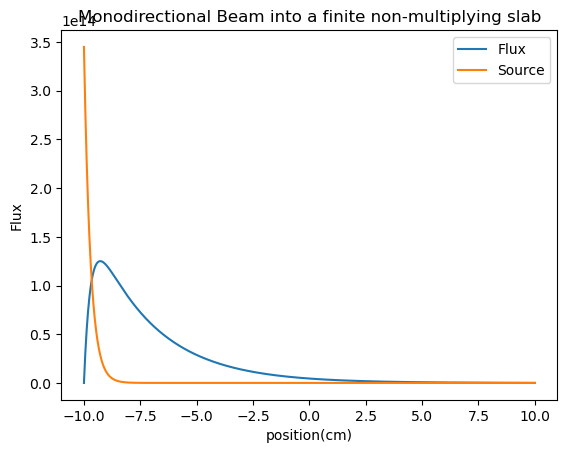

In [3]:
#Assignment 8
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from sympy import integrate


#Considering medium of water
b = 10
Sigma_t = 3.45 #[cm^-1]
Sigma_abs = 0.022 #[cm^-1]
Sigma_s = 3.45 #[cm^-1]
S0 = 1e14 #Source neutrons
D = 0.16 #cm 
L = np.sqrt(D/Sigma_abs) #Diffusion length

x_1,x_2 = sp.symbols('x_1,x_2')
Source = lambda x : S0*Sigma_s*np.exp(-Sigma_t*(b+x))
FluxS_r = Sigma_s*S0*sp.exp(-Sigma_t*(b+x_2))*L/D*sp.sinh((b+x_2)/L)/sp.sinh(2*b/L)*sp.sinh((b-x_1)/L) 
FluxS_l = Sigma_s*S0*sp.exp(-Sigma_t*(b+x_2))*L/D*sp.sinh((b-x_2)/L)/sp.sinh(2*b/L)*sp.sinh((b+x_1)/L)
Flux_l = integrate(FluxS_r,(x_2,-b,x_1))
Flux_r = integrate(FluxS_l,(x_2,x_1,b))
Flux = Flux_l+Flux_r #Total flux

length = np.linspace(-b,b,1000)
fun = sp.lambdify(x_1,Flux)

plt.figure()
plt.title('Monodirectional Beam into a finite non-multiplying slab')
plt.plot(length,fun(length), label = 'Flux')
plt.plot(length,Source(length), label = 'Source')
plt.xlabel('position(cm)')
plt.ylabel(r'Flux')
plt.legend(loc = 'best')
print('The equation obtained for the flux is : ')
Flux